# Using AWS Rekognition to recognise faces

### TODO : Set your bucket name here

In [1]:
bucket_name = 'applied-ai-20180924150202'
image_path = '../lfw'

### Imports

In [2]:
import os
import sys
sys.path.append('../') 

import random
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from utils import show_side_by_side, load_image_as_array
from aws_rekognition import train, test

### Create an array of images from our dataset

Create 2 arrays, X and y, containing our training data.  In machine learning terminology, X is the data (in our case the file path for the images) and y is the labels. For this example, we'll use a mix of images of David Beckham and Serena Williams from the LFW dataset.

In [3]:
X = []
y = []
names = ['david_beckham', 'serena_williams']
for name in names:
    for image in os.listdir(os.path.join(image_path, name)):
        filename = os.path.join(image_path, name, image) 
        X.append(filename)
        y.append(name)
X = np.array(X)
y = np.array(y)

In [4]:
y

array(['david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena

In [5]:
# def show_side_by_side(images:list, cmap:str='gray', figsize:tuple=None, labels:list=[])->None:
#     """Pass a list of images to display them side by side"""
#     fig, axes = plt.subplots(ncols=len(images), nrows=1)
    
#     if figsize:
#         fig.set_size_inches(*figsize)
        
#     for i, im in enumerate(images):
#         axes[i].imshow(im, cmap=cmap)
#         axes[i].set_xticks([])
#         axes[i].set_yticks([])
        
#     if len(labels) > 0:
#         for i, label in enumerate(labels):
#             axes[i].set_title(label)
    
#     plt.tight_layout()
    
# def load_image_as_array(path:str)->np.ndarray:
#     """Load image from disk into numpy array"""
#     img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
#     return img

def get_samples(X, y, num_samples=5):
    samples = [random.randint(0, len(X) - 1) for i in range(num_samples)]
    images = [load_image_as_array(image) for image in (X[samples])]
    labels = y[samples]
    return images, labels

### Let's look at a sample of the images
Create an index of 5 sample images to see what we have

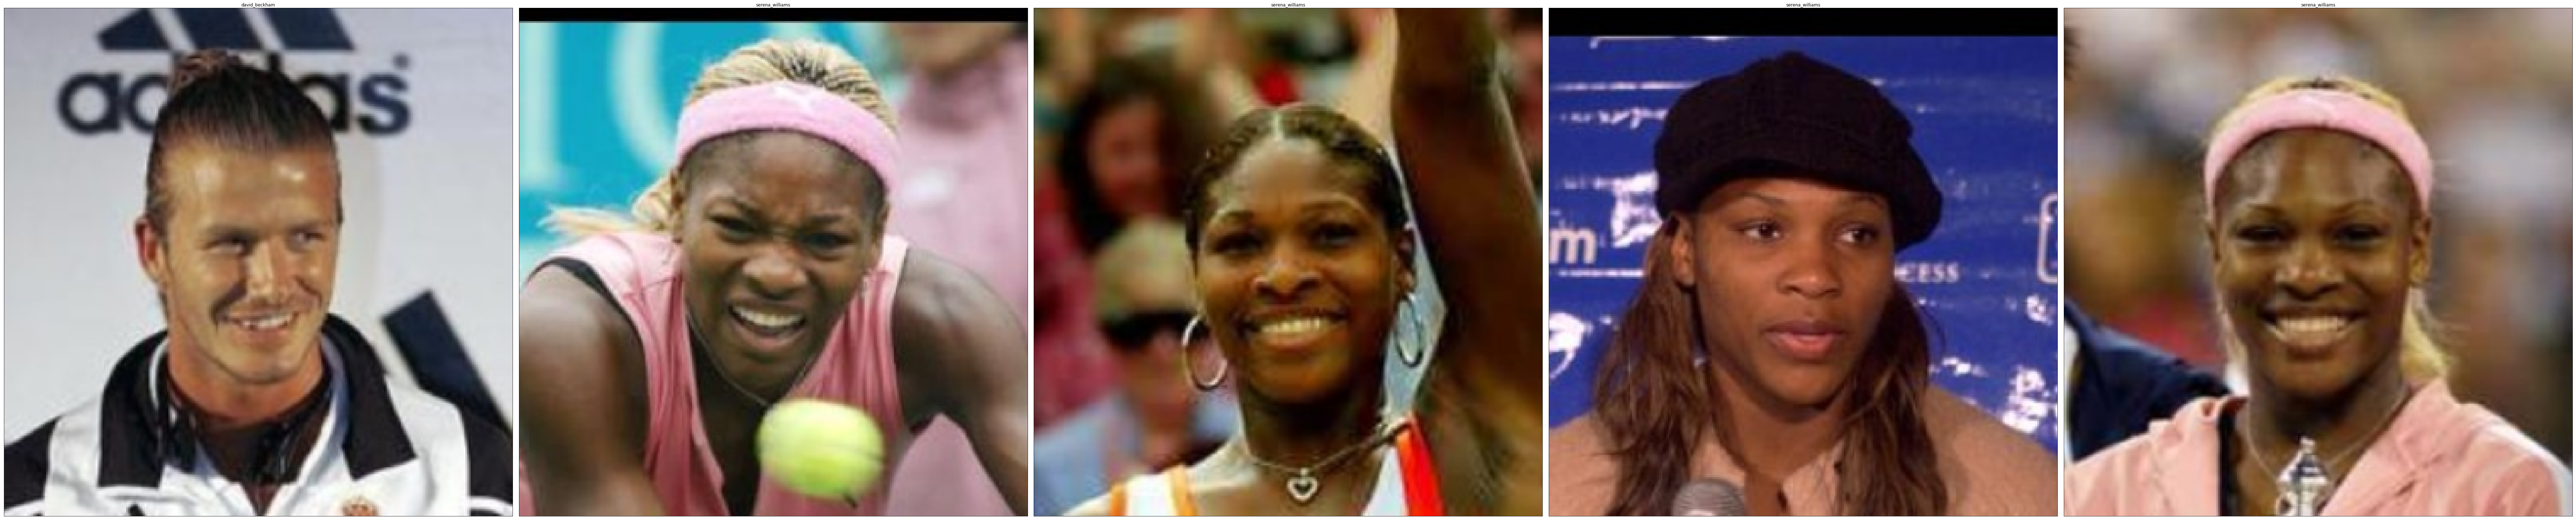

In [6]:
images, labels = get_samples(X, y)
show_side_by_side(images, figsize=(100,100), labels=labels) 

### Let's split our data into training and testing data

Obvioulsy, to do this properly we'd use more than just one person as this is going to overfit

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Let's view our train and testing data

In [8]:
[d for d in zip(X_train, y_train)]

[('../lfw/serena_williams/Serena_Williams_0024.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0047.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0004.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0010.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0041.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0015.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0003.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0013.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0027.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0014.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0051.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0006.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0010.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0040.jpg', 'serena_williams

In [9]:
[d for d in zip(X_test, y_test)]

[('../lfw/david_beckham/David_Beckham_0027.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0002.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0009.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0012.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0022.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0030.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0004.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0044.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0029.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0011.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0016.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0007.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0018.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0005.jpg', 'serena_williams'),
 ('../lfw/serena_williams/

### Now let's train Rekognition by copying our images to the S3 bucket

In [10]:
train(X_train, y_train, bucket_name)

../lfw/serena_williams/Serena_Williams_0024.jpg serena_williams
{'ResponseMetadata': {'RequestId': 'A94D65AD7E2AA58A', 'HostId': 'ejpeZJQx1thJBTqMCQc1nhFond6i2OTHKaOjloQQGgRLS0m0o7KBK/V88jGxJZxoCEkMAd+u/mI=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'ejpeZJQx1thJBTqMCQc1nhFond6i2OTHKaOjloQQGgRLS0m0o7KBK/V88jGxJZxoCEkMAd+u/mI=', 'x-amz-request-id': 'A94D65AD7E2AA58A', 'date': 'Mon, 22 Oct 2018 17:17:09 GMT', 'etag': '"5ab491f239ee5a9836e02fd8301a6895"', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'ETag': '"5ab491f239ee5a9836e02fd8301a6895"'}
../lfw/serena_williams/Serena_Williams_0047.jpg serena_williams
{'ResponseMetadata': {'RequestId': '4F7B71F58481E14D', 'HostId': 'KZW6PW8f3Ob0PKP2VaHq3V7k5jz9PUQjB+u/PJr+qxDU5xIYJLf4Z/D4PsOAh2SKgjYnDmMKRlo=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'KZW6PW8f3Ob0PKP2VaHq3V7k5jz9PUQjB+u/PJr+qxDU5xIYJLf4Z/D4PsOAh2SKgjYnDmMKRlo=', 'x-amz-request-id': '4F7B71F58481E14D', 'date': 'Mon, 22 Oct 2018 17:17:09 G

{'ResponseMetadata': {'RequestId': 'DEB22229215B70A5', 'HostId': 'CvFZekUKOtUCTbQCSE2Pw68N0TbHVGlaxHwPhjAyTywQPc86PXwBufXewIynWgPQlONXMZUvfxM=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'CvFZekUKOtUCTbQCSE2Pw68N0TbHVGlaxHwPhjAyTywQPc86PXwBufXewIynWgPQlONXMZUvfxM=', 'x-amz-request-id': 'DEB22229215B70A5', 'date': 'Mon, 22 Oct 2018 17:17:10 GMT', 'etag': '"8eb663a4d72a2c06478adf7d1649d06e"', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'ETag': '"8eb663a4d72a2c06478adf7d1649d06e"'}
../lfw/serena_williams/Serena_Williams_0045.jpg serena_williams
{'ResponseMetadata': {'RequestId': '709AD0902C046E27', 'HostId': 'fJI+BbpWDioO39jI9VD1SMctmW73dqJQLVtuX4N+VUf8lNPW1WiQid4kYwXxHUncnJAZdQmVTZM=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'fJI+BbpWDioO39jI9VD1SMctmW73dqJQLVtuX4N+VUf8lNPW1WiQid4kYwXxHUncnJAZdQmVTZM=', 'x-amz-request-id': '709AD0902C046E27', 'date': 'Mon, 22 Oct 2018 17:17:11 GMT', 'etag': '"b6be8ee4b898740656d9dd5621cc3000"', 'content-leng

{'ResponseMetadata': {'RequestId': '4F90BAA66832CF90', 'HostId': 'lqct+KeLF4MPBtciFAeP7fH8BgTGbIW838lcGNHmOkYbEIyE1UtW/e2ePa3gpwo1xYHwU3tzQp8=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'lqct+KeLF4MPBtciFAeP7fH8BgTGbIW838lcGNHmOkYbEIyE1UtW/e2ePa3gpwo1xYHwU3tzQp8=', 'x-amz-request-id': '4F90BAA66832CF90', 'date': 'Mon, 22 Oct 2018 17:17:12 GMT', 'etag': '"4288da96f406198fdece9c87d84f3bf8"', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'ETag': '"4288da96f406198fdece9c87d84f3bf8"'}
../lfw/serena_williams/Serena_Williams_0048.jpg serena_williams
{'ResponseMetadata': {'RequestId': '626B88F4C4A30E5B', 'HostId': 'fufS4spVFvU3xAosdtbRNuZrRd7snyU1FMr5z9hWTdperfuDBnEWLpKj6i1ugx027kd1r1w0ELw=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'fufS4spVFvU3xAosdtbRNuZrRd7snyU1FMr5z9hWTdperfuDBnEWLpKj6i1ugx027kd1r1w0ELw=', 'x-amz-request-id': '626B88F4C4A30E5B', 'date': 'Mon, 22 Oct 2018 17:17:12 GMT', 'etag': '"c00a9ef5afdeeda6cf80fe70b0a0f749"', 'content-leng

{'ResponseMetadata': {'RequestId': '6861F7F4A2EAC8D2', 'HostId': '5wQu9A7ej2QtoAIdS34IabRcRnAr6M1Rgfls4Www9sq9TOfojNyLRXpov4I/20lLZU/PP7KaI4A=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': '5wQu9A7ej2QtoAIdS34IabRcRnAr6M1Rgfls4Www9sq9TOfojNyLRXpov4I/20lLZU/PP7KaI4A=', 'x-amz-request-id': '6861F7F4A2EAC8D2', 'date': 'Mon, 22 Oct 2018 17:17:15 GMT', 'etag': '"ed3ec04a09538f5b3501961e9023ccec"', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'ETag': '"ed3ec04a09538f5b3501961e9023ccec"'}
../lfw/serena_williams/Serena_Williams_0008.jpg serena_williams
{'ResponseMetadata': {'RequestId': 'CD712B104B5CD569', 'HostId': 'AIK5wpJHhGlxx0Oj/8lARbhxNQ70+Re6QvdAbmQwOVlxyOAW3tpkC+9RsP24ASFDwol0Wzyxz8c=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'AIK5wpJHhGlxx0Oj/8lARbhxNQ70+Re6QvdAbmQwOVlxyOAW3tpkC+9RsP24ASFDwol0Wzyxz8c=', 'x-amz-request-id': 'CD712B104B5CD569', 'date': 'Mon, 22 Oct 2018 17:17:15 GMT', 'etag': '"2814be17f73fe5165b5c1df285e76957"', 'content-leng

{'ResponseMetadata': {'RequestId': '25A1907D8853A5AE', 'HostId': 'C2R+8cPGnHEoMXoEPWy5LXJj13J4INQkBF67IdYKThi9Yn4NmWwD5KF9dYQm9sdWgIW4qnsaiGA=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'C2R+8cPGnHEoMXoEPWy5LXJj13J4INQkBF67IdYKThi9Yn4NmWwD5KF9dYQm9sdWgIW4qnsaiGA=', 'x-amz-request-id': '25A1907D8853A5AE', 'date': 'Mon, 22 Oct 2018 17:17:16 GMT', 'etag': '"e1adbd882e2a8b08a6e461a532ca2e01"', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'ETag': '"e1adbd882e2a8b08a6e461a532ca2e01"'}
../lfw/serena_williams/Serena_Williams_0031.jpg serena_williams
{'ResponseMetadata': {'RequestId': '5AEB61CFE5C1EA34', 'HostId': 'd6eUf7AyaJNnhvSdbns9BxUnhM8EGmj5rF/ZX5R+kogCoMjLwgBr9I6TGpy3BEaF4fczb8Jn1mY=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'd6eUf7AyaJNnhvSdbns9BxUnhM8EGmj5rF/ZX5R+kogCoMjLwgBr9I6TGpy3BEaF4fczb8Jn1mY=', 'x-amz-request-id': '5AEB61CFE5C1EA34', 'date': 'Mon, 22 Oct 2018 17:17:16 GMT', 'etag': '"0e2b88cd5e6f5647d72538293134a99a"', 'content-leng

### Now let's test Rekognition to see how accurate it is
We'll use our test dataset for this

In [11]:
images, labels = get_samples(np.array(X_test), np.array(y_test))

In [12]:
def show_image(image):
    img = image.squeeze()
    plt.axis("off")
    plt.imshow(img, cmap='gray', interpolation='nearest')  # Manipulation to display image in the correct orientation!
    plt.show() 

Testing image ../lfw/david_beckham/David_Beckham_0027.jpg


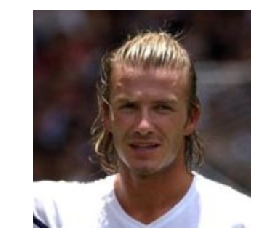

testing image ../lfw/david_beckham/David_Beckham_0027.jpg
Called rekognition...
('david_beckham', 99.9999008178711)


In [13]:
for image, label in zip(X_test, y_test):
    print('Testing image {}'.format(image))
    img = load_image_as_array(image)
    show_image(img) 
    inferred = test(image)
    print(inferred)
    break